In [78]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
API_URL = "https://api-inference.huggingface.co/models/mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
headers = {"Authorization": "Bearer "}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	
def func(prompt):
	output = query({
		"inputs": prompt,
	})
	return output

In [51]:
prompt = """ Highlights uMaerskâ€™s Q2 2023 EBITDA of USD2.9 billion (- 72% Y/Y; -27% Q/Q) was 16% above consensus estimate, attributed to good cost management instead of strong rates, in our view. The fall in earnings was mainly caused by Ocean (-76% Y/ Y; -33% Q/Q) on reduced freight rates (-51% Y/ Y; -15% Q/Q) and weaker volumes (-6% Y/Y; +7% Q/Q). uMaersk lifted the bottom end of its 2023 EBITDA guidance to USD9.5-USD11.0 billion from USD8.0-11.0 billion reflecting the stronger H1 2023 results but lowered its 2023 market volume outlook to -4.0% to -1.0% (previously - 2.5% to +0.5%) on continued inventory correction till the end of 2023. We think the implied sequential drop in H1 2023 earnings reflects the ongoing decline in Maerskâ€™s contracted rate given that they are being reset to a level nearer to the spot which has fallen sharply since mid-2022. Also, we gathered that the industryâ€™s supply of new vessels may increase freight capacity by 9% and 10% in 2023 and 2024 respectively, which we think will outgrow demand causing overcapacity and further deterioration in freight rates. uWe forecast EPS of USD220 for 2023 and USD100 for 2024 as we expect a further weakness in freight rates."""

In [52]:
print(func(prompt))

[[{'label': 'negative', 'score': 0.9974895715713501}, {'label': 'positive', 'score': 0.0022708200849592686}, {'label': 'neutral', 'score': 0.00023959331156220287}]]


------------------

In [55]:
df = pd.read_csv(r'C:\Users\hp\Desktop\sem6\PL Lab\leb11-OEL\train_data.csv')

In [62]:
df.head()

,sentence,label
0,Highlights\nuMaersk’s Q2 2023 EBITDA of USD2.9...,negative
1,Highlights\nuWe expect 2023 total sales to con...,positive
2,"Highlights\nuIn 2023, we expect revenue growth...",positive
3,Highlights\nuTight supply conditions hurt AEIS...,positive
4,Highlights\nuAena’s Q2 2023 EPS of EUR3.16 bea...,positive


In [79]:
df['count'] = df['sentence'].apply(lambda x: len(x.split()))

In [81]:
df.head()

,sentence,label,count
0,Highlights\nuMaersk’s Q2 2023 EBITDA of USD2.9...,0,201
1,Highlights\nuWe expect 2023 total sales to con...,1,194
2,"Highlights\nuIn 2023, we expect revenue growth...",1,195
3,Highlights\nuTight supply conditions hurt AEIS...,1,201
4,Highlights\nuAena’s Q2 2023 EPS of EUR3.16 bea...,1,191


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2000x400 with 0 Axes>

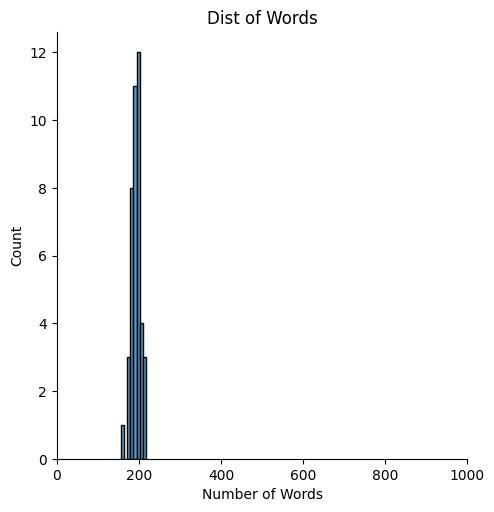

In [85]:
plt.figure(figsize=(20,4))
sns.displot(df['count'])
plt.xlim(0,1000)
plt.xlabel('Number of Words')
plt.title('Dist of Words')
plt.show()

In [57]:
df.shape

(42, 2)

In [63]:
X = list(df["sentence"])

In [64]:
# Convert "label" column to 0/1
df['label'] = df['label'].apply(lambda x: 1 if x == 'positive' else 0)

In [65]:
y = list(df['label'])

In [69]:
print(y)

[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [75]:
X_train

['Highlights\nuMarks & Spencer (MKS) released a trading \nupdate covering the first 19 weeks of FY24 \n(Mar.) up to August 12. MKS saw continued \nmarket share growth in both Clothing & Home \nand Food. Like-for-Like (LFL) sales growth \ncame in as a positive to us, up 11% LFL and 6% \nLFL for Clothing & Home, and Food, respectively. \nRecall that in its FY23 results, MKS reported \nsales growth of 9.9%, driven by Clothing & \nHome (+11.5%), Food (+8.7%), and \nInternational (+12.6%). The sustained growth \nmomentum reflects MKS’ attractive value \nproposition amid continued price investment, in \nour view. \nuAs part of its mid-term objectives, MKS targets \nadjusted operating martin (AOM) to c.4% and \nc.10% for Food, and Home & Clothing, \nrespectively. Recall that FY23 AOM at 5.2% is \nbehind FY22 at 6.5% as muted pricing activity \nwas insufficient to offset sourcing and freight \ncosts. In its trading update, MKS indicated \n“significant improvement against previous \nexpectation

In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')